In [1]:
import numpy as np

import pandas as pd

messages1 = pd.read_csv('../input/jigsaw-toxic-severity-rating/validation_data.csv')

#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


#messages1.head(1)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
messages1.drop('worker',axis=1)

,less_toxic,more_toxic
0,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"
...,...,...
30103,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30104,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30105,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook
30106,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook


In [3]:
more_tox= pd.DataFrame(zip(messages1.more_toxic))
more_tox

,0
0,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,Daphne Guinness \n\nTop of the mornin' my fav...
2,"""Atom you don't believe actual photos of mastu..."
3,You seem to have sand in your vagina.\n\nMight...
4,"hey \n\nway to support nazis, you racist"
...,...
30103,get out my large penis
30104,get out my large penis
30105,Piss off you slant eyed-gook
30106,Piss off you slant eyed-gook


In [4]:
less_tox= pd.DataFrame(zip(messages1.less_toxic))
less_tox

,0
0,This article sucks \n\nwoo woo wooooooo
1,"""And yes, people should recognize that but the..."
2,"Western Media?\n\nYup, because every crime in..."
3,And you removed it! You numbskull! I don't car...
4,smelly vagina \n\nBluerasberry why don't you ...
...,...
30103,I'm sorry. I'm not an admin. I will give you t...
30104,I'm sorry. I'm not an admin. I will give you t...
30105,"wow...\nare you out of your mind, how was my e..."
30106,"wow...\nare you out of your mind, how was my e..."


In [5]:
less_tox['y'] = '0'


In [6]:
less_tox

,0,y
0,This article sucks \n\nwoo woo wooooooo,0
1,"""And yes, people should recognize that but the...",0
2,"Western Media?\n\nYup, because every crime in...",0
3,And you removed it! You numbskull! I don't car...,0
4,smelly vagina \n\nBluerasberry why don't you ...,0
...,...,...
30103,I'm sorry. I'm not an admin. I will give you t...,0
30104,I'm sorry. I'm not an admin. I will give you t...,0
30105,"wow...\nare you out of your mind, how was my e...",0
30106,"wow...\nare you out of your mind, how was my e...",0


In [7]:
more_tox['y'] = '1'
more_tox


,0,y
0,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...,1
1,Daphne Guinness \n\nTop of the mornin' my fav...,1
2,"""Atom you don't believe actual photos of mastu...",1
3,You seem to have sand in your vagina.\n\nMight...,1
4,"hey \n\nway to support nazis, you racist",1
...,...,...
30103,get out my large penis,1
30104,get out my large penis,1
30105,Piss off you slant eyed-gook,1
30106,Piss off you slant eyed-gook,1


In [8]:
more_tox.columns=['text','y']
more_tox.head(1)

,text,y
0,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...,1


In [9]:
less_tox.columns=['text','y']
less_tox.head(1)

,text,y
0,This article sucks \n\nwoo woo wooooooo,0


In [10]:
print(more_tox.shape)
print(less_tox.shape)

(30108, 2)
(30108, 2)


In [11]:
messages2=pd.concat([more_tox,less_tox])
messages2

,text,y
0,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...,1
1,Daphne Guinness \n\nTop of the mornin' my fav...,1
2,"""Atom you don't believe actual photos of mastu...",1
3,You seem to have sand in your vagina.\n\nMight...,1
4,"hey \n\nway to support nazis, you racist",1
...,...,...
30103,I'm sorry. I'm not an admin. I will give you t...,0
30104,I'm sorry. I'm not an admin. I will give you t...,0
30105,"wow...\nare you out of your mind, how was my e...",0
30106,"wow...\nare you out of your mind, how was my e...",0


In [12]:
messages2.iloc[30108]

text     This article sucks \n\nwoo woo wooooooo
y                                              0
Name: 0, dtype: object

In [13]:
#messages.sort_index()
messages=messages2.reset_index(drop=True)

In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60216 entries, 0 to 60215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60216 non-null  object
 1   y       60216 non-null  object
dtypes: object(2)
memory usage: 941.0+ KB


In [15]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ',str(messages['text'][i])) 
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()    


In [16]:
y=messages['y']


In [17]:
#np.save("y.npy", y)


In [18]:
"""del corpus
del messages"""

'del corpus\ndel messages'

In [19]:
#np.save("X.npy", X)

#loaded_array = np.load("X.npy")

In [20]:
#X = np.load('../input/notebookf4f9440013/X.npy')

In [21]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [22]:
import numpy as np
#np.save("X_train.npy", X_train)
#np.save("X_test.npy", X_test)
#np.save("y_train.npy", y_train)
#np.save("y_test.npy", y_test)


In [23]:
del X

In [24]:
cv.get_feature_names()[:20]


['aa',
 'aaron',
 'ab',
 'abandon',
 'abbr',
 'abc',
 'abd',
 'abduct',
 'abdul',
 'abe',
 'abe gay',
 'abhorr',
 'abid',
 'abil',
 'abl',
 'abl edit',
 'abl edit page',
 'abl get',
 'abl respond',
 'abl use']

In [25]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 20000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [26]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())


In [27]:
count_df.head()


,aa,aaron,ab,abandon,abbr,abc,abd,abduct,abdul,abe,...,zigz,zigz gger,zion,zionism,zionist,zip,zoe,zombi,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()


accuracy:   0.606
Confusion matrix, without normalization


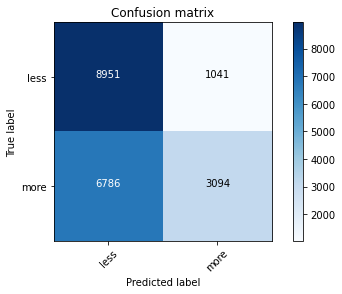

In [30]:
from sklearn import metrics
import numpy as np
import itertools
model1=classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['less', 'more'])

In [31]:
#model1.save(model1)

In [32]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.6061292270531401

In [33]:
y_train.shape


(40344,)

accuracy:   0.592
Confusion matrix, without normalization


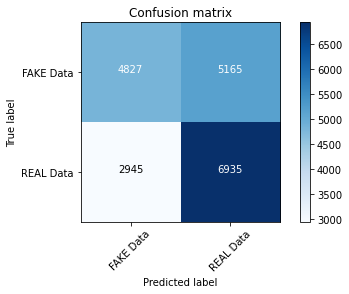

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [35]:
test1=pd.read_csv('../input/jigsaw-toxic-severity-rating/comments_to_score.csv')
test1.head()

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...


In [36]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(test1)):
    review = re.sub('[^a-zA-Z]', ' ',str(test1['text'][i])) 
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()  

In [37]:
X_train.shape

(40344, 20000)

In [38]:
X.shape

(7537, 20000)

In [39]:

predict = classifier.predict(X)
